# Tarea - Aprendizaje Supervisado

En esta tarea, explorará la relación entre la complejidad del modelo y el rendimiento de la generalización, ajustando los parámetros clave de varios modelos de aprendizaje supervisado. La parte 1 de esta tarea analizará la regresión y la parte 2 analizará la clasificación.

## Parte 1 - Regresión

Ejecutar el siguiente código para crear las variables necesarias

In [1]:
%config IPCompleter.greedy=True

[ 0.35281047  0.79431716  1.62431903  2.59103578  3.23065446  3.375973
  4.47573197  4.96972856  5.69364194  6.51069113  7.17166586  8.14799756
  8.72363612  9.31004929 10.08877265]
(11,)
(11,)


<IPython.core.display.Javascript object>


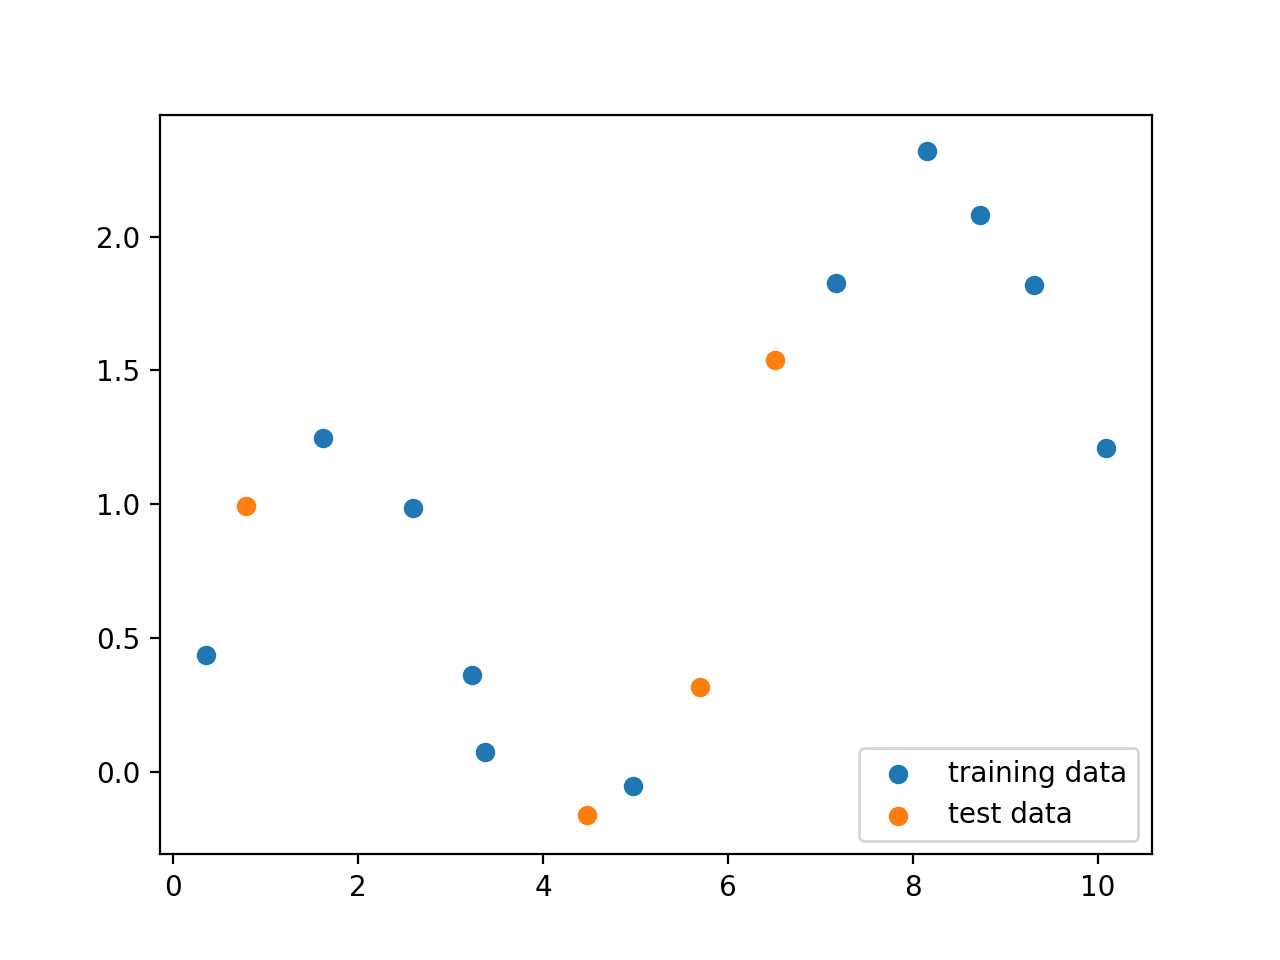

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
print (x)
print(X_train.shape)
print(y_train.shape)
# Puede utilizar esta función para ayudarle a visualizar el conjunto de datos
# trazar un diagrama de dispersión de los puntos de datos
# en los conjuntos de entrenamiento y prueba.
def part1_scatter():
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTA: la funcion de abajo para visualizar los datos
part1_scatter()

### Pregunta 1

Escriba una función que se ajuste a un modelo de regresión lineal polinomial en los *datos de entrenamiento* `X_train` para los grados 1, 3, 6 y 9. (Use PolynomialFeatures en sklearn.preprocessing para crear las características polinomiales y luego ajustar un modelo de regresión lineal) Para cada modelo, encuentre 100 valores predichos en el intervalo x = 0 a 10 (por ejemplo, `np.linspace(0,10,100)`) y almacénelos en una matriz numérica. La primera fila de esta matriz debe corresponder a la salida del modelo entrenado en el grado 1, la segunda fila en el grado 3, la tercera fila en el grado 6 y la cuarta fila en el grado 9 (*Hint:* Usar `np.vstack` para agregar filas a la matriz numpy).

<img src="readonly/polynomialreg1.png" style="width: 1000px;"/>

La figura de arriba muestra los modelos ajustados graficados sobre los datos originales (usando `plot_one()`).

<br>
*Esta función debería devolver una matriz numpy con forma `(4, 100)`*

In [18]:
def respuesta1():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    return # tu respuesta

In [19]:
# Puedes usar la función plot_one() para replicar la figura
# del mensaje una vez que haya completado la pregunta uno
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)
    
plot_one(respuesta1())

NameError: name 'plt' is not defined

### Pregunta 2

Escriba una función que se ajuste a un modelo de regresión lineal polinomial en los datos de entrenamiento `X_train` para los grados 0 a 9. Para cada modelo, calcule la puntuación de regresión $R^2$ (coeficiente de determinación) en los datos de entrenamiento y en los datos de la prueba y devuelve ambas matrices en una tupla.

*Esta función debería devolver una tupla de matrices numpy `(r2_train, r2_test)`. Ambas matrices deben tener forma `(10,)`*

In [9]:
def respuesta2():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    return # tu respuesta
respuesta2()


### Pregunta 3

Con base en las puntuaciones de $R^2$ de la pregunta 2 (niveles de grado 0 a 9), ¿Qué nivel de grado corresponde a un modelo que no se ajusta bien (underfitting)? ¿Qué grado corresponde a un modelo sobreajustado (overfitting)? ¿Qué elección de nivel de grado proporcionaría un modelo con un buen rendimiento de generalización en este conjunto de datos? Nota: puede haber varias soluciones correctas para esta pregunta.

(Sugerencia: intente graficar `plt.plot` los puntajes de $R^2$ de la pregunta 2 para visualizar la relación entre el nivel de grado y $R^2$)

*Esta función debería devolver una tupla con los valores de grado en este orden: `(Subajuste, Sobreajuste, Buena_Generalización)`*

In [10]:
def respuesta3():
    
    return # tu respuesta
respuesta3()

### Pregunta 4

El entrenamiento de modelos en características polinomiales de alto grado puede resultar en modelos demasiado complejos que se sobreajustan, por lo que a menudo usamos versiones regularizadas del modelo para restringir la complejidad del modelo, como vimos con la regresión lineal Ridge y Lasso.

Para esta pregunta, entrene dos modelos: un modelo de Regresión lineal no regularizado (parámetros predeterminados) y un modelo de Regresión de lazo regularizado (con parámetros `alpha = 0.01`,` max_iter = 10000`) en características polinómicas de grado 12. Devuelva el valor $R^2$ para los conjuntos de prueba del modelo LinearRegression y Lasso.

* Esta función debería devolver una tupla `(LinearRegression_R2_score, Lasso_R2_score)` *

In [12]:
def respuesta4():
 

    return #tu respuesta
respuesta4()

## Parte 2 - Clasificación

Para esta sección de la tarea, trabajaremos con el [Conjunto de datos de hongos UCI] (http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) almacenado en `mushrooms.csv` . Los datos se utilizarán para entrenar un modelo para predecir si un hongo es venenoso o no. Se proporcionan los siguientes atributos:

* Información de atributos: *
1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

Los datos del conjunto de datos de hongos están actualmente codificados con cadenas. Estos valores deberán codificarse en numéricos para funcionar con sklearn. Usaremos pd.get_dummies para convertir las variables categóricas en variables indicadoras.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use las variables X_train, y_train 2 para la Pregunta 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# Por motivos de rendimiento en las preguntas 6 y 7, crearemos una versión más pequeña del
# conjunto de datos de hongos completo para usar en esas preguntas. Por simplicidad, simplemente reutilizaremos
# la división de prueba del 25% creada anteriormente como subconjunto representativo.
#
# Utilice las variables X_subset, y_subset para las preguntas 6 y 7.
X_subset = X_test2
y_subset = y_test2
print(X_train2.shape)
print(X_test2.shape)

(6093, 117)
(2031, 117)


### Pregunta 5

Utilizando `X_train2` y` y_train2` de la celda anterior, entrena un DecisionTreeClassifier con los parámetros predeterminados y random_state = 0. ¿Cuáles son las 5 características más importantes encontradas por el árbol de decisiones?

Como recordatorio, los nombres de las características están disponibles en la propiedad `X_train2.columns`, y el orden de las características en` X_train2.columns` coincide con el orden de los valores de importancia de las características en la propiedad `feature_importances_` del clasificador.

*Esta función debe devolver una lista de longitud 5 que contenga los nombres de las funciones en orden descendente de importancia.*

In [15]:
def respuesta5():

    return #tu respuesta
respuesta5()

### Pregunta 6

Para esta pregunta, usaremos la función `validation_curve` en `sklearn.model_selection` para determinar los puntajes de entrenamiento y prueba para un Clasificador de vectores de soporte (`SVC`) con valores de parámetros variables. Recuerda que la función validation_curve, además de tomar un objeto clasificador no ajustado inicializado, toma un conjunto de datos como entrada y realiza sus propias divisiones internas de entrenamiento-prueba para calcular los resultados.

**Debido a que la creación de una curva de validación requiere ajustar varios modelos, por razones de rendimiento, esta pregunta usará solo un subconjunto del conjunto de datos de hongos original: use las variables X_subset e y_subset como entrada para la función de la curva de validación (en lugar de X_mush e y_mush) para reducir el tiempo de cálculo.**

El objeto clasificador no ajustado inicializado que usaremos es un clasificador de máquinas de vectores de soporte con kernel de base radial. Entonces, su primer paso es crear un objeto `SVC` con parámetros predeterminados (es decir,` kernel = 'rbf', C = 1`) y `random_state = 0`. Recuerde que el ancho del kernel del kernel RBF se controla mediante el parámetro `gamma`.

Con este clasificador, y el conjunto de datos en X_subset, y_subset, explore el efecto de `gamma` en la precisión del clasificador usando la función` validation_curve` para encontrar los puntajes de entrenamiento y prueba para 6 valores de `gamma` desde` 0.0001` a `10 `(es decir,` np.logspace (-4,1,6) `). Recuerde que puede especificar qué métrica de puntuación desea que use validation_curve estableciendo el parámetro "score". En este caso, queremos utilizar la "precisión" como métrica de puntuación.

Para cada nivel de `gamma`,` validation_curve` se ajustará a 3 modelos en diferentes subconjuntos de los datos, lo que arrojará dos matrices de 6x3 (6 niveles de gamma x 3 ajustes por nivel) de las puntuaciones para los conjuntos de entrenamiento y prueba.

Encuentre la puntuación media en los tres modelos para cada nivel de "gamma" para ambas matrices, creando dos matrices de longitud 6 y devuelva una tupla con las dos matrices.

p.ej.

si uno de su conjunto de puntuaciones es

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
entonces debería convertirse en

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*Esta función debería devolver una tupla de matrices numpy `(scores_entrenamiento, scores_prueba)` donde cada matriz en la tupla tiene forma `(6,)`.*

In [16]:
def respuesta6():

    return #tu respuesta
respuesta6()

### Pregunta 7

Con base en los puntajes de la pregunta 6, ¿qué valor de gamma corresponde a un modelo que no es adecuado (y tiene la peor precisión del conjunto de entrenamiento y prueba)? ¿Qué valor de gamma corresponde a un modelo que está sobreajustado (y tiene la peor precisión del conjunto de prueba)? ¿Qué elección de gamma sería la mejor opción para un modelo con un buen rendimiento de generalización en este conjunto de datos (alta precisión tanto en el entrenamiento como en el conjunto de prueba)? Nota: puede haber varias soluciones correctas para esta pregunta.

(Sugerencia: intenta graficar las puntuaciones de la pregunta 6 para visualizar la relación entre gamma y precisión).

*Esta función debería devolver una tupla con los valores de grado en este orden: `(Subajuste, Sobreajuste, Buena_Generalización)`*

In [17]:
def respuesta7():

    
    return # tu respuesta
respuesta7()